In [1]:
import os
os.chdir(u'E:/量知/Ali/dmlib')
import pandas as pd
import numpy as np

train = pd.read_csv(u'E:/量知/ML/DATA/House_Price/train.csv') #house price predict
test = pd.read_csv(u'E:/量知/ML/DATA/House_Price/test.csv')

### 利用一些数据集测试dmlib中的各类函数

### sampling

#### Weight_Sample 加权采样

In [2]:
from sampling.WeightSample import WeightSample
ws = WeightSample(probCol ='SalePrice' ,weight=2 ,sampleRatio=0.5, replace=False).transform(train) #某一列加权，整体按采样比例随机采样
ws.head()

sampling\WeightSample.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_frame[self.probCol] = data_frame[self.probCol] * self.weight


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1272,1273,20,RL,NaN,13526,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2006,WD,Normal,274000
446,447,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,380000
469,470,60,RL,76.0,9291,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,374000
196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,623744
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,358000


#### Random Sample 随机采样

In [3]:
from sampling.RandomSample import RandomSample
rs = RandomSample(sampleRatio=0.2, replace=False).transform(train)

In [4]:
#---#
rs.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1294,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
554,555,60,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,284000
1017,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml,187500
795,796,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,171000


In [12]:
len(rs)

292

#### Stratified_Sample 分层采样

In [13]:
from sampling.StratifiedSample import StratifiedSample
ss = StratifiedSample(strataColName='BsmtCond',sampleRatio=0.1 ).transform(train)
#--#
ss.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1013.0,0.0,0.0,NaN,2.0,1Fam,Fa,No,0.0,0.0,...,ConLD,0.0,Pave,6.0,1013.0,AllPub,0.0,1915.0,1982.0,2009.0
1,768.0,664.0,0.0,Grvl,2.0,1Fam,Fa,No,0.0,0.0,...,WD,0.0,Pave,7.0,264.0,AllPub,270.0,1910.0,2002.0,2007.0
2,1651.0,0.0,0.0,NaN,3.0,1Fam,Fa,No,1398.0,208.0,...,WD,0.0,Pave,7.0,1606.0,AllPub,192.0,1986.0,1986.0,2008.0
3,1440.0,1440.0,0.0,Pave,8.0,2fmCon,Fa,No,256.0,0.0,...,WD,0.0,Pave,14.0,1440.0,AllPub,0.0,1914.0,1995.0,2007.0
4,581.0,530.0,0.0,NaN,3.0,1Fam,Fa,No,0.0,0.0,...,WD,0.0,Pave,6.0,530.0,AllPub,0.0,1920.0,1996.0,2007.0


### setoperation

#### Filter_and_Mapping 过滤与映射

In [6]:
from setoperation.filterandmapping import FilterandMapping
f = FilterandMapping('SalePrice>10000')
r = f.transform(train)

In [7]:
#--#
r.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### JOIN （左连接，右连接，内连接，全连接）

In [2]:
s1 = pd.Series(np.array([1,2,3,4]))
s2 = pd.Series(np.array([2,4,5,6]))
s3 = pd.Series(np.array([1,3,5,7]))
df1 = pd.DataFrame({"A": s1 , "B": s2 , "C": s3 })
df2 = pd.DataFrame({"A":pd.Series(np.array([1,2,5,6])), "D":pd.Series(np.array([4,5,6,7])), "E":pd.Series(np.array([3,4,5,6])) })

In [3]:
print "df1:\n",df1
print "df2:\n",df2

df1:
   A  B  C
0  1  2  1
1  2  4  3
2  3  5  5
3  4  6  7
df2:
   A  D  E
0  1  4  3
1  2  5  4
2  5  6  5
3  6  7  6


In [4]:
from setoperation.Join import Join
j = Join(joinType='inner',leftColNames='A',rightColNames='A')
result = j.transform(df1, df2)

In [5]:
#--#
result

,A,B,C,D,E
0,1,2,1,4,3
1,2,4,3,5,4


#### Union 行合并

In [15]:
from setoperation.Union import Union
u = Union(leftSelectCol='A',rightSelectCol='A',Deduplicate=True)
result = u.transform(df1, df2)

In [16]:
#--#
result

0    1
1    2
2    3
3    4
2    5
3    6
Name: A, dtype: int32

#### ColumnsMerge 列合并

In [17]:
from setoperation.ColumnsMerge import ColumnsMerge
m = ColumnsMerge(leftSelectCol='B',rightSelectCol='D',autoRenameCol=True)
cm = m.transform(df1, df2)

2017-06-08 09:38:03,798 INFO: MainThread [ColumnsMerge.transform, Line:28] Start merging columns.
2017-06-08 09:38:03,801 INFO: MainThread [ColumnsMerge.transform, Line:36] Columns Merge successfully.


In [18]:
cm

,B,D
0,2,4
1,4,5
2,5,6
3,6,7


### preprocess

#### AppendID  增加序号列

In [19]:
from preprocess.AppendID import AppendID
a = AppendID()
appendID = a.transform(train)

2017-06-08 09:38:07,187 INFO: MainThread [AppendID.transform, Line:25] Start AppendID.
2017-06-08 09:38:07,191 INFO: MainThread [AppendID.transform, Line:30] AppendID successfully.


#### Normalize 归一化

In [20]:
from preprocess.Normalize import Normalize
n = Normalize(featureColNames=['LotFrontage','MSSubClass'], keepOriginal=True)
normalized = n.transform(train)

In [21]:
#--#
normalized.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,normalized_LotFrontage,normalized_MSSubClass
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,0.150685,0.235294
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,0.202055,0.000000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,0.160959,0.235294
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,0.133562,0.294118
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,0.215753,0.235294


#### Standardize 标准化

In [22]:
from preprocess.Standardize import Standardize
s = Standardize(featureColNames=['MSSubClass'],keepOriginal=True)
standardized = s.transform(train)

2017-06-08 09:38:11,944 INFO: MainThread [Standardize.transform, Line:32] Start Standardize.
C:\Program Files\Anaconda2\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Program Files\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

In [23]:
#--#
standardized.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,normalized_LotFrontage,normalized_MSSubClass,original_MSSubClass
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,0.150685,0.235294,0.073375
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,0.202055,0.000000,-0.872563
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,0.160959,0.235294,0.073375
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,0.133562,0.294118,0.309859
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,0.215753,0.235294,0.073375


#### TypeTransform

In [3]:
from preprocess.TypeTransform import TypeTransform
tt = TypeTransform(double_selectCols=['MSSubClass'],double_default=0.0,keepOriginal=True)
tt2 = tt.transform(train)


In [4]:
#--#
tt2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,origin_MSSubClass
0,1,60.0,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,60
1,2,20.0,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,20
2,3,60.0,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,60
3,4,70.0,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,70
4,5,60.0,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,60


### feature_engineer

#### FeatureScale 特征尺度变换

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
from feature_engineer.featurescale import FeatureScale
fs = FeatureScale(featureColNames=['LotArea'],categoryCols=None,labelCol=None,scaleMethod='log2')
fs2 = fs.transform(train)

feature_engineer\featurescale.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe[self.featureColNames[i]][j] = float('%.2f'%np.math.log(value[j],2) )      #bug
2017-06-09 09:57:50,450 INFO: MainThread [featurescale.transform, Line:79] FeatureScale successfully.


In [5]:
fs2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,13,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,13,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,13,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,13,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,13,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Feature_Soften特征异常平滑

feature_engineer\featuresoften.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe[col][j] = self.cl*std + mean
feature_engineer\featuresoften.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe[col][j] = self.cl*std + mean


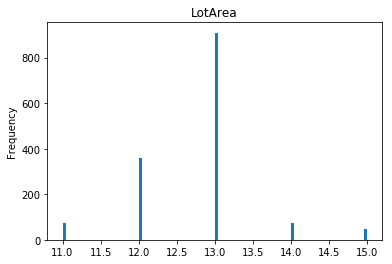

2017-06-09 10:06:56,052 INFO: MainThread [featuresoften.transform, Line:102] FeatureSoften successfully.


In [6]:
from feature_engineer.featuresoften import FeatureSoften
fs = FeatureSoften(featureColNames=['LotArea'],categoryCols=None,labelCol=None,softMethod=0,cl=3)
fs2 = fs.transform(train)

#### One_Hot_Encoding 独热编码

In [11]:
train['SaleType'].value_counts()

8    1267
6     122
0      43
3       9
5       5
4       5
1       4
7       3
2       2
Name: SaleType, dtype: int64

In [2]:
from feature_engineer.onehotencoding import OneHotEncoding
oe = OneHotEncoding(binaryCols=['SaleType'])
oe2 = oe.transform(train)

2017-06-09 10:32:51,328 INFO: MainThread [onehotencoding.transform, Line:49] Onehotencoding successfully.


[[ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  1.]]


#### GBDT_Importance GBDT特征重要性评估

In [2]:
iris = pd.read_csv(u"E:/量知/ML/DATA/IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


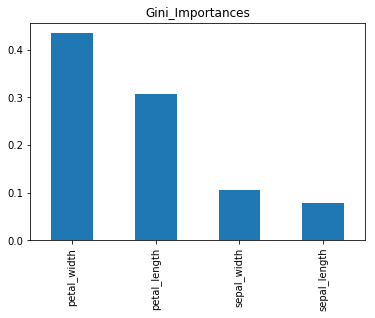

2017-06-09 11:09:28,441 INFO: MainThread [GBDTimportance.transform, Line:49] GBDTFeatureSelect successfully.


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3)
gbdt.fit(iris.drop('label',1), iris['label'])

from feature_engineer.GBDTimportance import GBDTImportance
gi = GBDTImportance(modelName=gbdt,labelColName='label',featureColNames=list(iris.drop('label',1).columns))
gbdt_importance = gi.transform(iris)

#### LabelEncoding 

####  Regression_Importance回归模型特征重要性评估

2017-06-09 11:40:35,835 INFO: MainThread [labelencoding.transform, Line:32] Start LabelEncoding.
2017-06-09 11:40:35,841 INFO: MainThread [labelencoding.transform, Line:36] LabelEncoding successfully.


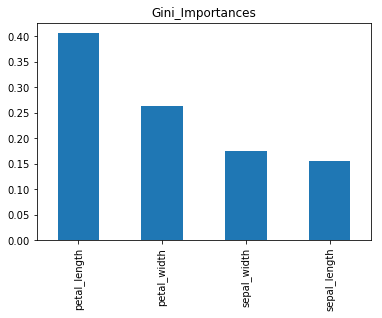

2017-06-09 11:40:36,020 INFO: MainThread [regressionimportance.transform, Line:56] regression importance plot successfully.


In [11]:
from feature_engineer.labelencoding import LabelEncoding
iris2 = LabelEncoding(featureColNames=['label']).transform(iris)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(iris2.drop('label',1), iris2['label'])

from feature_engineer.regressionimportance import RegressionImportance
ri = RegressionImportance(modelName=gbr,labelColName='label',featureColNames=list(iris.drop('label',1).columns))
r_importance = ri.transform(iris2)

#### RandomForest_Importance 随机森林特征重要性

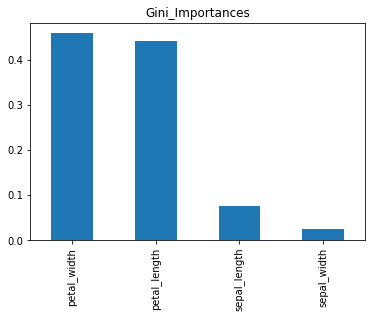

2017-06-09 14:03:24,381 INFO: MainThread [randomForestImportance.transform, Line:56] RandomForestFeatureSelect successfully.


              importances
petal_width      0.458760
petal_length     0.440511
sepal_length     0.076033
sepal_width      0.024697


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_depth=10)
rf.fit(iris.drop('label',1), iris['label'])

from feature_engineer.randomForestImportance import RandomForestImportance
rfi = RandomForestImportance(modelName=rf, labelColName='label',featureColNames=list(iris.drop('label',1).columns))
rf_importance = rfi.transform(iris)

#### FeatureDiscrete 特征离散

<class 'matplotlib.axes._subplots.AxesSubplot'>


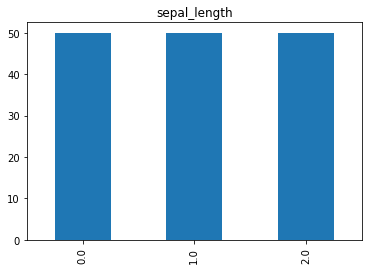

2017-06-09 15:02:58,109 INFO: MainThread [featureDiscrete.transform, Line:145] Feature discrete successfully.


In [4]:
from feature_engineer.featureDiscrete import FeatureDiscrete
fd = FeatureDiscrete(discreteCols=['sepal_length'], discreteMethod=1, maxBins=3,reserve=True)  #method=1: 等频离散
fd_iris = fd.transform(iris)

In [5]:
fd_iris['sepal_length'].value_counts()

2.0    50
1.0    50
0.0    50
Name: sepal_length, dtype: int64

bins:

[3.2999999999999998, 5.5, 6.7000000000000002, 7.9000000000000004]
cats:

[(3.3, 5.5], (3.3, 5.5], (3.3, 5.5], (3.3, 5.5], (3.3, 5.5], ..., (5.5, 6.7], (5.5, 6.7], (5.5, 6.7], (5.5, 6.7], (5.5, 6.7]]
Length: 150
Categories (3, interval[float64]): [(3.3, 5.5] < (5.5, 6.7] < (6.7, 7.9]]


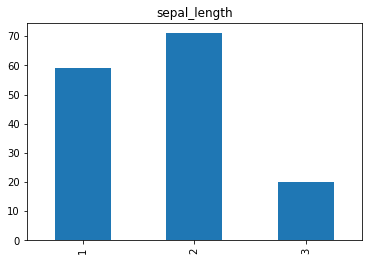

2017-06-09 15:10:35,365 INFO: MainThread [featureDiscrete.transform, Line:148] Feature discrete successfully.


{'modelvalue': [{'binNum': 2, 'cutpoints': [5.5, 6.7000000000000002]}], 'modelkey': ['sepal_length']}


In [3]:
from feature_engineer.featureDiscrete import FeatureDiscrete
fd = FeatureDiscrete(discreteCols=['sepal_length'], discreteMethod=0, maxBins=3,reserve=True)  #method=0: 等距离散
fd_iris = fd.transform(iris)

feature bin: [1]


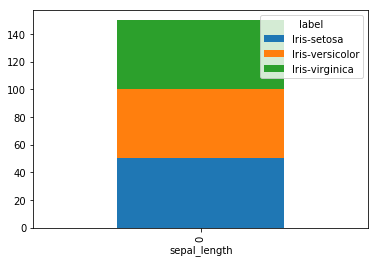

2017-06-09 15:16:50,424 INFO: MainThread [featureDiscrete.transform, Line:148] Feature discrete successfully.


{'modelvalue': [{'binNum': 3, 'cutpoints': [1]}], 'modelkey': ['sepal_length']}


In [6]:
from feature_engineer.featureDiscrete import FeatureDiscrete
fd = FeatureDiscrete(discreteCols=['sepal_length'],labelCol='label', discreteMethod=2, maxBins=3,reserve=True)  #method=2: 基于熵增益离散等距离散
fd_iris = fd.transform(iris)